In [ ]:
using Revise, Plots, LinearAlgebra, LaTeXStrings, Random, Images, Printf
using ForwardDiff

In [2]:
includet("../../src/SparseSpikes.jl")
using .SparseSpikes


Define ground truth amplitudes and positions

In [3]:
domain = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

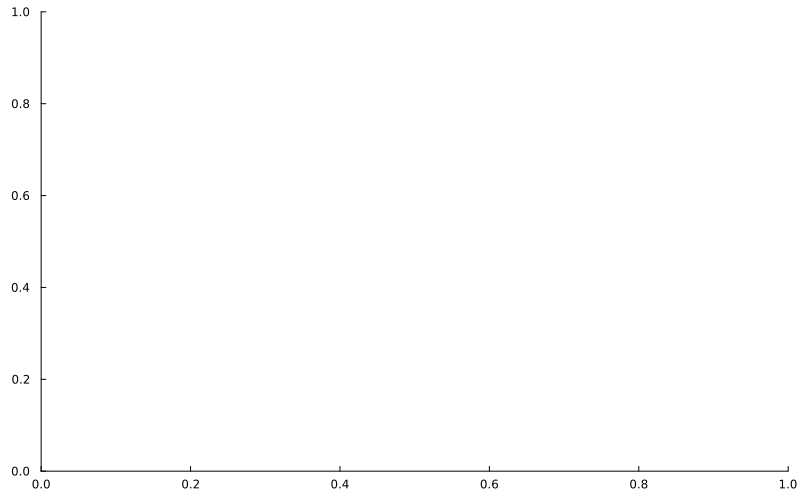

In [4]:
# Define the plot
num_points = 64

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / (num_points - 1) for j in 0:num_points-1, i in 0:num_points-1]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / (num_points - 1) for j in 0:num_points-1, i in 0:num_points-1]

grid = range(0, stop=1, length=num_points)
plot_size = (400, 250) .* 2
plt = heatmap(xlims=domain[1], ylims=domain[2], color=:viridis, size=plot_size, grid=false)

In [5]:
# const noise_mean = 0.0021172377176794793
const σ2 = let
    λ = 723.0 # Wavelength
    NA = 1.4 # Numerical aperture
    FWHM = λ / (2 * NA) # Full width at half maximum i.e. diffraction limit
    σ = FWHM / (2 * log(2.0))
    (σ / (64 * 100.0))^2
end
σ = sqrt(σ2)

ops = gaussian_operators_2D(σ, plt_grid_x1, plt_grid_x2)

Operators(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.015873015873015872; … ; 1.0 0.9841269841269841; 1.0 1.0], 590.3102629802514)), 4096), var"#Φ#33"{var"#ϕ#32"{Int64}, Int64}(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.015873015873015872; … ; 1.0 0.9841269841269841; 1.0 1.0], 590.3102629802514)), 4096), Core.Box(var"#gauss2D#31"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.015873015873015872; … ; 1.0 0.9841269841269841; 1.0 1.0], 590.3102629802514)), 4096), var"#adjΦ#38"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#30#39"{var"#ϕ#32"{Int64}}}([0.0 0.015873015873015872 … 0.9841269841269841 1.0; 0.0 0.015873015873015872 … 0.9841269841269841 1.0; … ; 0.0 0.015873015873015872 … 0.9841269841269841 1.0; 0.0 0.015873015873015872 … 0.9841269841269841 1.0], [0.0 0.0 … 0.0 0.0; 0.015873015873015872

In [6]:
plt_obs = deepcopy(plt)

image = load("../../high_density/sequence/00234.tif")

y = channelview(image)

64×64 reinterpret(reshape, N0f16, ::Matrix{Gray{N0f16}}) with eltype N0f16:
 0.00259  0.002    0.00182  0.0023   …  0.00208  0.00229  0.00191  0.00211
 0.00197  0.00218  0.00229  0.00194     0.0022   0.00233  0.00246  0.002
 0.00224  0.00211  0.00172  0.00189     0.00235  0.00256  0.00177  0.00198
 0.00203  0.00221  0.0018   0.00203     0.00211  0.00183  0.00209  0.00182
 0.00191  0.00224  0.00192  0.00235     0.00186  0.0018   0.002    0.00198
 0.00244  0.00204  0.00174  0.00212  …  0.00211  0.00182  0.00224  0.00208
 0.00189  0.00224  0.00227  0.00241     0.00223  0.00221  0.00217  0.00238
 0.00201  0.0023   0.00208  0.00203     0.00206  0.00192  0.00191  0.00203
 0.00226  0.0023   0.00218  0.00183     0.002    0.00194  0.00183  0.0022
 0.00211  0.00201  0.00232  0.0023      0.00235  0.00217  0.00217  0.00186
 ⋮                                   ⋱  ⋮                          
 0.00229  0.00223  0.00246  0.0022   …  0.0023   0.00203  0.00206  0.00183
 0.00223  0.00174  0.00246  0.0018

In [7]:
λ = 0.032

prob = BLASSO(vec(y), ops, domain, λ)

BLASSO(N0f16[0.00259N0f16, 0.00197N0f16, 0.00224N0f16, 0.00203N0f16, 0.00191N0f16, 0.00244N0f16, 0.00189N0f16, 0.00201N0f16, 0.00226N0f16, 0.00211N0f16  …  0.00204N0f16, 0.00183N0f16, 0.00237N0f16, 0.00227N0f16, 0.00227N0f16, 0.00253N0f16, 0.00215N0f16, 0.00197N0f16, 0.0022N0f16, 0.00244N0f16], Operators(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.015873015873015872; … ; 1.0 0.9841269841269841; 1.0 1.0], 590.3102629802514)), 4096), var"#Φ#33"{var"#ϕ#32"{Int64}, Int64}(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.015873015873015872; … ; 1.0 0.9841269841269841; 1.0 1.0], 590.3102629802514)), 4096), Core.Box(var"#gauss2D#31"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.015873015873015872; … ; 1.0 0.9841269841269841; 1.0 1.0], 590.3102629802514)), 4096), var"#adjΦ#38"{Matrix{Float64}, Matrix{F

In [425]:
n_spikes = 50
solve!(prob, :BSFW, options=Dict(:maxits => n_spikes))

BSFW iterations: 100%|██████████████████████████████████| Time: 0:00:41


BLASSO(N0f16[0.00259N0f16, 0.00197N0f16, 0.00224N0f16, 0.00203N0f16, 0.00191N0f16, 0.00244N0f16, 0.00189N0f16, 0.00201N0f16, 0.00226N0f16, 0.00211N0f16  …  0.00204N0f16, 0.00183N0f16, 0.00237N0f16, 0.00227N0f16, 0.00227N0f16, 0.00253N0f16, 0.00215N0f16, 0.00197N0f16, 0.0022N0f16, 0.00244N0f16], Operators(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.015873015873015872; … ; 1.0 0.9841269841269841; 1.0 1.0], 590.3102629802514)), 4096), var"#Φ#33"{var"#ϕ#32"{Int64}, Int64}(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.015873015873015872; … ; 1.0 0.9841269841269841; 1.0 1.0], 590.3102629802514)), 4096), Core.Box(var"#gauss2D#31"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.015873015873015872; … ; 1.0 0.9841269841269841; 1.0 1.0], 590.3102629802514)), 4096), var"#adjΦ#38"{Matrix{Float64}, Matrix{F

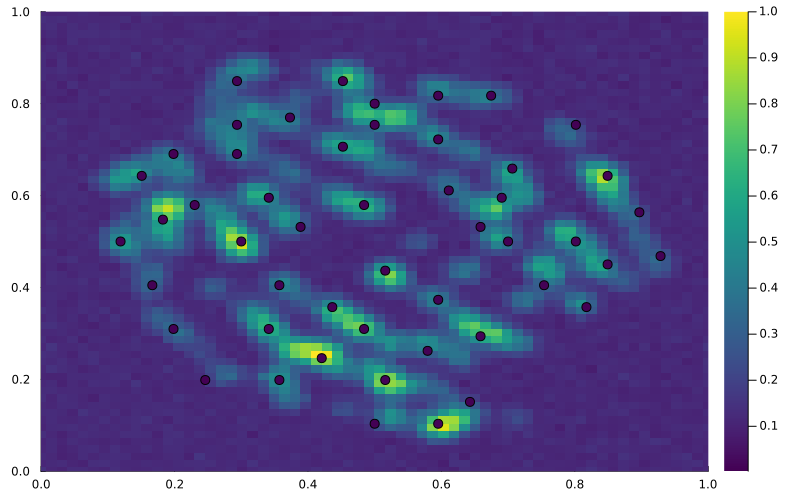

In [93]:
heatmap!(plt_obs, grid, grid, y ./ maximum(y), c=:viridis)

plot_spikes!(plt_obs, prob.μ)

In [426]:
ns = 0.0#01
xvals = deepcopy(prob.μ.x) .+ [randn(size(prob.μ.x[1])) .* ns, randn(size(prob.μ.x[2])) .* 0.01ns]
avals = deepcopy(prob.μ.a) .+ randn(size(prob.μ.a)) .* ns

50-element Vector{Float64}:
 0.012935203632844394
 0.009932477325774439
 0.01192178994163947
 0.012404786214344309
 0.01163624962326285
 0.006905015966269556
 0.011752589587436708
 0.011278517500144341
 0.00828386141101569
 0.008414813343884053
 ⋮
 0.004724031404725809
 0.004777529946990232
 0.003272366975248398
 0.0034133769799369745
 0.003330433646378157
 0.0035129468691008385
 0.002558719330189172
 0.0035461424544213677
 0.0033570662565189924

In [478]:
function local_descent_BFGS!(
    xvals::AbstractVector{<:AbstractVector{T}},
    avals::AbstractVector{T},
    Φ::Function,
    y::AbstractVector{<:Number},
    λ::Real,
    k::Int,
    domain::AbstractVector{<:AbstractVector{<:Real}},
    amplitudes_lo::Real=-Inf
) where {T<:Real}
    x1vals, x2vals = xvals

    function func(xa)
        x1 = @view xa[1:k]
        x2 = @view xa[k+1:2k]
        a = @view xa[2k+1:end]
        return λ * norm(a, 1) + 0.5 * sum(abs2, y .- Φ(x1, x2, a))
    end

    ax0 = vcat(x1vals, x2vals, avals)
    lower_bounds = vcat(fill(domain[1][1], k), fill(domain[2][1], k), fill(amplitudes_lo, k))
    upper_bounds = vcat(fill(domain[1][2], k), fill(domain[2][2], k), fill(Inf, k))
    clamp_strict!(ax0, lower_bounds, upper_bounds)

    result = optimize(
        func,
        ax0,
        BFGS(linesearch=LineSearches.BackTracking()),
        Optim.Options(store_trace=true, f_tol=1e-6, g_tol=1e-5, time_limit=200);
        autodiff=:forward
    )
    display(result)

    xa_opt = Optim.minimizer(result)

    clamp_strict!(xa_opt, lower_bounds, upper_bounds)

    x1vals .= xa_opt[1:k]
    x2vals .= xa_opt[k+1:2k]
    avals .= xa_opt[2k+1:end]

    Optim.trace(result)
end

local_descent_BFGS! (generic function with 3 methods)

In [479]:
bfgs_xvals = deepcopy(xvals)
bfgs_avals = deepcopy(avals)
bfgs_trace = local_descent_BFGS!(
    bfgs_xvals,
    bfgs_avals,
    ops.Φ,
    vec(y),
    λ,
    n_spikes,
    domain,
    0
)

nothing

 * Status: success

 * Candidate solution
    Final objective value:     1.957311e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 8.01e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 8.62e-06 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.51e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 7.70e-07 ≤ 1.0e-06
    |g(x)|                 = 3.88e-03 ≰ 1.0e-05

 * Work counters
    Seconds run:   108  (vs limit 200)
    Iterations:    212
    f(x) calls:    562
    ∇f(x) calls:   213


In [480]:
function local_descent_LBFGS!(
    xvals::AbstractVector{<:AbstractVector{T}},
    avals::AbstractVector{T},
    Φ::Function,
    y::AbstractVector{<:Number},
    λ::Real,
    k::Int,
    domain::AbstractVector{<:AbstractVector{<:Real}},
    amplitudes_lo::Real=0
) where {T<:Real}
    x1vals, x2vals = xvals

    function func(xa)
        x1 = @view xa[1:k]
        x2 = @view xa[k+1:2k]
        a = @view xa[2k+1:end]
        return λ * norm(a, 1) + 0.5 * sum(abs2, y .- Φ(x1, x2, a))
    end

    ax0 = vcat(x1vals, x2vals, avals)
    lower_bounds = vcat(fill(domain[1][1], k), fill(domain[2][1], k), fill(amplitudes_lo, k))
    upper_bounds = vcat(fill(domain[1][2], k), fill(domain[2][2], k), fill(Inf, k))

    clamp_strict!(ax0, lower_bounds, upper_bounds)

    result = optimize(
        func,
        ax0,
        LBFGS(linesearch=LineSearches.BackTracking()),
        Optim.Options(store_trace=true, f_tol=1e-6, g_tol=1e-5, time_limit=200);
        autodiff=:forward
    )
    display(result)
    xa_opt = Optim.minimizer(result)

    clamp_strict!(xa_opt, lower_bounds, upper_bounds)

    x1vals .= xa_opt[1:k]
    x2vals .= xa_opt[k+1:2k]
    avals .= xa_opt[2k+1:end]

    Optim.trace(result)
end

local_descent_LBFGS! (generic function with 2 methods)

In [481]:
lbfgs_xvals = deepcopy(xvals)
lbfgs_avals = deepcopy(avals)
lbfgs_trace = local_descent_LBFGS!(
    lbfgs_xvals,
    lbfgs_avals,
    ops.Φ,
    vec(y),
    λ,
    n_spikes,
    domain,
    0
)
nothing

 * Status: success

 * Candidate solution
    Final objective value:     1.960788e-02

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.07e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.15e-06 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.62e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.27e-07 ≤ 1.0e-06
    |g(x)|                 = 6.74e-03 ≰ 1.0e-05

 * Work counters
    Seconds run:   94  (vs limit 200)
    Iterations:    181
    f(x) calls:    203
    ∇f(x) calls:   182


In [474]:
function local_descent_smooth!(
    xvals::AbstractVector{<:AbstractVector{T}},
    avals::AbstractVector{T},
    Φ::Function,
    y::AbstractVector{<:Number},
    λ::Real,
    k::Int,
    domain::AbstractVector{<:AbstractVector{<:Real}},
    amplitudes_lo::Real=0
) where {T<:Real}
    x1vals, x2vals = xvals

    function func(xuv)
        x1 = xuv[1:k]
        x2 = xuv[k+1:2k]
        u = xuv[2k+1:3k]
        v = xuv[3k+1:end]
        return 0.5λ * (sum(abs2, u) + sum(abs2, v)) + 0.5 * sum(abs2, y .- Φ(x1, x2, u .* v))
    end

    u0 = sqrt.(abs.(avals))
    v0 = avals ./ u0

    xuv0 = vcat(x1vals, x2vals, u0, v0)
    lower_bounds = vcat(fill(domain[1][1], k), fill(domain[2][1], k), fill(0, k), fill(amplitudes_lo, k))
    upper_bounds = vcat(fill(domain[1][2], k), fill(domain[2][2], k), fill(Inf, k), fill(Inf, k))
    clamp_strict!(xuv0, lower_bounds, upper_bounds)

    result = optimize(
        func,
        xuv0,
        BFGS(linesearch=LineSearches.BackTracking()),
        Optim.Options(store_trace=true, f_tol=1e-6, g_tol=1e-5, time_limit=200);
        autodiff=:forward
    )
    display(result)
    xuv_opt = Optim.minimizer(result)

    clamp_strict!(xuv_opt, lower_bounds, upper_bounds)

    x1vals .= xuv_opt[1:k]
    x2vals .= xuv_opt[k+1:2k]

    avals .= xuv_opt[2k+1:3k] .* xuv_opt[3k+1:end]

    Optim.trace(result)
end

local_descent_smooth! (generic function with 2 methods)

In [476]:
smooth_xvals = deepcopy(xvals)
smooth_avals = deepcopy(avals)
smooth_trace = local_descent_smooth!(
    smooth_xvals,
    smooth_avals,
    ops.Φ,
    vec(y),
    λ,
    n_spikes,
    domain,
    0
)
nothing

 * Status: success

 * Candidate solution
    Final objective value:     1.956562e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.26e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.44e-05 ≰ 0.0e+00
    |f(x) - f(x')|         = 9.26e-09 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.73e-07 ≤ 1.0e-06
    |g(x)|                 = 6.30e-03 ≰ 1.0e-05

 * Work counters
    Seconds run:   99  (vs limit 200)
    Iterations:    152
    f(x) calls:    417
    ∇f(x) calls:   153


In [483]:
function replace_nonfinite!(A)
    for i in eachindex(A)
        if !isfinite(A[i])
            A[i] = 0.0
        end
    end
    return A
end

function local_descent_smooth_inner!(
    xvals::AbstractVector{<:AbstractVector{T}},
    avals::AbstractVector{T},
    Φ::Function,
    y::AbstractVector{<:Number},
    λ::Real,
    k::Int,
    domain::AbstractVector{<:AbstractVector{<:Real}},
    amplitudes_lo::Real=0
) where {T<:Real}
    x1vals, x2vals = xvals

    function func(xu)
        x1 = @view xu[1:k]
        x2 = @view xu[k+1:2k]
        u = @view xu[2k+1:end]
        M = Φ(x1, x2, diagm(u))
        replace_nonfinite!(M)
        v = (M'M + λ * I(k)) \ M'y
        return 0.5λ * (sum(abs2, u) + sum(abs2, v)) + 0.5 * sum(abs2, y .- M * v)
    end

    u0 = sqrt.(abs.(avals))
    xu0 = vcat(x1vals, x2vals, u0)
    lower_bounds = vcat(fill(domain[1][1], k), fill(domain[2][1], k), fill(amplitudes_lo, k))
    upper_bounds = vcat(fill(domain[1][2], k), fill(domain[2][2], k), fill(Inf, k))
    clamp_strict!(xu0, lower_bounds, upper_bounds)

    result = optimize(
        func,
        xu0,
        BFGS(linesearch=LineSearches.BackTracking()),
        Optim.Options(store_trace=true, f_tol=1e-6, g_tol=1e-5, time_limit=100);
        autodiff=:forward
    )
    display(result)
    xu_opt = Optim.minimizer(result)

    clamp_strict!(xu_opt, lower_bounds, upper_bounds)

    x1vals .= xu_opt[1:k]
    x2vals .= xu_opt[k+1:2k]

    u_opt = xu_opt[2k+1:end]
    M = Φ(x1vals, x2vals, diagm(u_opt))
    v = (M'M + λ * I(k)) \ M'y

    avals .= u_opt .* v

    Optim.trace(result)
end



local_descent_smooth_inner! (generic function with 2 methods)

In [484]:
smooth_inner_xvals = deepcopy(xvals)
smooth_inner_avals = deepcopy(avals)
smooth_inner_trace = local_descent_smooth_inner!(
    smooth_inner_xvals,
    smooth_inner_avals,
    ops.Φ,
    vec(y),
    λ,
    n_spikes,
    domain,
    0
)
nothing

 * Status: failure (exceeded time limit of 100.0)

 * Candidate solution
    Final objective value:     1.960781e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 4.47e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.81e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.70e-06 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.40e-04 ≰ 1.0e-06
    |g(x)|                 = 5.35e-03 ≰ 1.0e-05

 * Work counters
    Seconds run:   102  (vs limit 100)
    Iterations:    37
    f(x) calls:    67
    ∇f(x) calls:   38


In [ ]:
function local_descent_lasso_inner!(
    xvals::AbstractVector{<:AbstractVector{T}},
    avals::AbstractVector{T},
    Φ::Function,
    y::AbstractVector{<:Number},
    λ::Real,
    k::Int,
    domain::AbstractVector{<:AbstractVector{<:Real}},
    amplitudes_lo::Real=0
) where {T<:Real}
    x1vals, x2vals = xvals

    a = avals

    function func(x, a)
        x1 = @view x[1:k]
        x2 = @view x[k+1:2k]

        afwd = ForwardDiff.convert.(eltype(x1), a)

        res = optimize(
            a -> λ * norm(a, 1) + 0.5 * sum(abs2, y .- Φ(x1, x2, a)),
            afwd,
            BFGS(linesearch=LineSearches.BackTracking()),
            Optim.Options(g_tol=1e-3, iterations=10);
            autodiff=:forward
        )
        afwd .= Optim.minimizer(res)

        a .= ForwardDiff.value.(afwd)

        return λ * norm(a, 1) + 0.5 * sum(abs2, y .- Φ(x1, x2, a))
    end

    x00 = vcat(x1vals, x2vals)
    lower_bounds = vcat(fill(domain[1][1], k), fill(domain[2][1], k))
    upper_bounds = vcat(fill(domain[1][2], k), fill(domain[2][2], k))
    clamp_strict!(x00, lower_bounds, upper_bounds)

    result = optimize(
        x -> func(x, a),
        x00,
        BFGS(linesearch=LineSearches.BackTracking()),
        Optim.Options(store_trace=true, f_tol=1e-6, g_tol=1e-5, time_limit=60);
        autodiff=:forward
    )
    display(result)
    x0_opt = Optim.minimizer(result)

    x1vals .= x0_opt[1:k]
    x2vals .= x0_opt[k+1:2k]

    Optim.trace(result)
end

local_descent_lasso_inner! (generic function with 2 methods)

In [ ]:
lasso_inner_xvals = deepcopy(xvals)
lasso_inner_avals = deepcopy(avals)
lasso_inner_trace = local_descent_lasso_inner!(
    lasso_inner_xvals,
    lasso_inner_avals,
    ops.Φ,
    vec(y),
    λ,
    n_spikes,
    domain,
    0
)
nothing

In [ ]:
function local_descent_lasso_smooth!(
    xvals::AbstractVector{<:AbstractVector{T}},
    avals::AbstractVector{T},
    Φ::Function,
    y::AbstractVector{<:Number},
    λ::Real,
    k::Int,
    domain::AbstractVector{<:AbstractVector{<:Real}},
    amplitudes_lo::Real=0
) where {T<:Real}
    x1vals, x2vals = xvals

    a = avals

    function func(x, a)
        x1 = @view x[1:k]
        x2 = @view x[k+1:2k]

        afwd = ForwardDiff.convert.(eltype(x1), a)

        u = sqrt.(abs.(afwd))
        v = afwd ./ u
        uv = vcat(u, v)

        function func_inner(uv)
            u = @view uv[1:k]
            v = @view uv[k+1:2k]
            return λ * (sum(abs2, u) + sum(abs2, v)) + 0.5 * sum(abs2, y .- Φ(x1, x2, u .* v))
        end

        res = optimize(
            func_inner,
            uv,
            BFGS(linesearch=LineSearches.BackTracking()),
            Optim.Options(g_tol=1e-3, iterations=10);
            autodiff=:forward
        )

        uv .= Optim.minimizer(res)

        a .= ForwardDiff.value.(afwd)

        return λ * norm(a, 1) + 0.5 * sum(abs2, y .- Φ(x1, x2, a))
    end

    x00 = vcat(x1vals, x2vals)
    lower_bounds = vcat(fill(domain[1][1], k), fill(domain[2][1], k))
    upper_bounds = vcat(fill(domain[1][2], k), fill(domain[2][2], k))
    clamp_strict!(x00, lower_bounds, upper_bounds)

    result = optimize(
        x -> func(x, a),
        x00,
        BFGS(linesearch=LineSearches.BackTracking()),
        Optim.Options(store_trace=true, f_tol=1e-6, g_tol=1e-5, time_limit=60);
        autodiff=:forward
    )
    display(result)
    x0_opt = Optim.minimizer(result)

    x1vals .= x0_opt[1:k]
    x2vals .= x0_opt[k+1:2k]

    Optim.trace(result)
end

local_descent_lasso_smooth! (generic function with 2 methods)

In [491]:
lasso_smooth_xvals = deepcopy(xvals)
lasso_smooth_avals = deepcopy(avals)
lasso_smooth_trace = local_descent_lasso_smooth!(
    lasso_smooth_xvals,
    lasso_smooth_avals,
    ops.Φ,
    vec(y),
    λ,
    n_spikes,
    domain,
    0
)
nothing

 * Status: failure (exceeded time limit of 60.0)

 * Candidate solution
    Final objective value:     2.038162e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 5.83e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 6.28e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.56e-05 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.75e-03 ≰ 1.0e-06
    |g(x)|                 = 7.10e-03 ≰ 1.0e-05

 * Work counters
    Seconds run:   65  (vs limit 60)
    Iterations:    1
    f(x) calls:    3
    ∇f(x) calls:   2


In [500]:
function local_descent_trilevel!(
    xvals::AbstractVector{<:AbstractVector{T}},
    avals::AbstractVector{T},
    Φ::Function,
    y::AbstractVector{<:Number},
    λ::Real,
    k::Int,
    domain::AbstractVector{<:AbstractVector{<:Real}},
    amplitudes_lo::Real=0
) where {T<:Real}
    x1vals, x2vals = xvals

    a = avals

    function func(x, a)
        x1 = @view x[1:k]
        x2 = @view x[k+1:2k]

        afwd = ForwardDiff.convert.(eltype(x1), a)

        u = sqrt.(abs.(afwd))

        function func_inner(u)
            M = Φ(x1, x2, diagm(u))
            replace_nonfinite!(M)
            v = (M'M + λ * I(k)) \ M'y
            return 0.5λ * (sum(abs2, u) + sum(abs2, v)) + 0.5 * sum(abs2, y .- M * v)
        end

        res = optimize(
            func_inner,
            u,      
            BFGS(linesearch=LineSearches.BackTracking()),
            Optim.Options(f_tol=1e-1, g_tol=1e-1, iterations=10);
            autodiff=:forward
        )

        u .= Optim.minimizer(res)

        M = Φ(x1vals, x2vals, diagm(u))
        v = (M'M + λ * I(k)) \ M'y

        afwd .= u .* v

        a .= ForwardDiff.value.(afwd)

        return λ * norm(a, 1) + 0.5 * sum(abs2, y .- Φ(x1, x2, a))
    end

    x00 = vcat(x1vals, x2vals)
    lower_bounds = vcat(fill(domain[1][1], k), fill(domain[2][1], k))
    upper_bounds = vcat(fill(domain[1][2], k), fill(domain[2][2], k))
    clamp_strict!(x00, lower_bounds, upper_bounds)

    result = optimize(
        x -> func(x, a),
        x00,
        BFGS(linesearch=LineSearches.BackTracking()),
        Optim.Options(store_trace=true, f_tol=1e-6, g_tol=1e-5, time_limit=60);
        autodiff=:forward
    )
    display(result)
    x0_opt = Optim.minimizer(result)

    x1vals .= x0_opt[1:k]
    x2vals .= x0_opt[k+1:2k]

    Optim.trace(result)
end



local_descent_trilevel! (generic function with 2 methods)

In [501]:
lasso_trilevel_xvals = deepcopy(xvals)
lasso_trilevel_avals = deepcopy(avals)
lasso_trilevel_trace = local_descent_trilevel!(
    lasso_trilevel_xvals,
    lasso_trilevel_avals,
    ops.Φ,
    vec(y),
    λ,
    n_spikes,
    domain,
    0
)
nothing

 * Status: failure (exceeded time limit of 60.0)

 * Candidate solution
    Final objective value:     2.038162e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 5.83e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 6.28e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.56e-05 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.75e-03 ≰ 1.0e-06
    |g(x)|                 = 7.10e-03 ≰ 1.0e-05

 * Work counters
    Seconds run:   79  (vs limit 60)
    Iterations:    1
    f(x) calls:    3
    ∇f(x) calls:   2


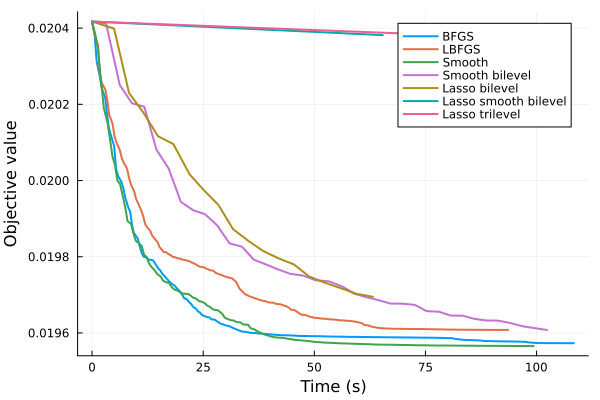

In [502]:
bfgs_trace_time = accumulate_traces_time(bfgs_trace)
lbfgs_trace_time = accumulate_traces_time(lbfgs_trace)
smooth_trace_time = accumulate_traces_time(smooth_trace)
smooth_inner_trace_time = accumulate_traces_time(smooth_inner_trace)
lasso_inner_trace_time = accumulate_traces_time(lasso_inner_trace)
lasso_inner2_trace_time = accumulate_traces_time(lasso_inner2_trace)
lasso_smooth_trace_time = accumulate_traces_time(lasso_smooth_trace)
lasso_trilevel_trace_time = accumulate_traces_time(lasso_trilevel_trace)

plot(
    bfgs_trace_time[:time],
    bfgs_trace_time[:objective],
    label="BFGS",
    linewidth=2,
)
plot!(
    lbfgs_trace_time[:time],
    lbfgs_trace_time[:objective],
    label="LBFGS",
    linewidth=2,
)
plot!(
    smooth_trace_time[:time],
    smooth_trace_time[:objective],
    label="Smooth",
    linewidth=2,
)
plot!(
    smooth_inner_trace_time[:time],
    smooth_inner_trace_time[:objective],
    label="Smooth bilevel",
    linewidth=2,
)
plot!(
    lasso_inner_trace_time[:time],
    lasso_inner_trace_time[:objective],
    label="Lasso bilevel",
    linewidth=2,
)
plot!(
    lasso_smooth_trace_time[:time],
    lasso_smooth_trace_time[:objective],
    label="Lasso smooth bilevel",
    linewidth=2,
)
plot!(
    lasso_trilevel_trace_time[:time],
    lasso_trilevel_trace_time[:objective],
    label="Lasso trilevel",
    linewidth=2,
)
# plot!(xlims=(0, 1))
# plot!(ylims=(0.02375, 0.02384))
plot!(xlabel="Time (s)", ylabel="Objective value") 

In [ ]:
# savefig("Trace_comparison.svg")

"c:\\Users\\ladis\\OneDrive - University of Warwick\\Year 4\\Super resolution\\Codes\\SparseSpikes\\examples\\Benchmarking\\Trace_comparison.svg"

In [41]:
function accumulate_traces_time(trace)
    times = Float64[]
    objectives = Float64[]
    cum_time = 0.0
    last_time = 0.0

    for t in trace
        curr_time = t.metadata["time"]

        # Detect reset of inner solver (time goes back to 0)
        if curr_time < last_time
            # Add final time from previous inner problem to accumulator
            cum_time += last_time
        end

        push!(times, cum_time + curr_time)
        push!(objectives, t.value)
        last_time = curr_time
    end

    return Dict(:time => times, :objective => objectives)
end

accumulate_traces_time (generic function with 1 method)